Overfitting means the model performs well on the training data,but it doesnot generalize well.
The possible solutions can be :
>To simplify the model by selecting one with fewer parameters
>To gather more training data
>To reduce the noise in training data

Constraining the model to make it simpler and resuce the risk of Overfitting is called Regularization
A good way to reduce overfitting is to regularize the model(i.e.to constrain it): the fewer degrees of freedom it has,the haarder it will be for it overfit the data,which means by reducing the number of polynomial degrees.

For a linear model,regularization is typically achieved by constraining the weights of model such as Ridge Regression,Lasso Regression.

# Ridge Regression (Tikhonov regularization)
It is regularized version of Linear Regression:a regularization term (alpha) is added to the cost function.This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible.It should only be added to the cost function during training.Adds penalty equivalent to square of the magnitude of the coefficients.It is majorly used to prevent overfitting.

In [34]:
from sklearn.linear_model import Ridge

In [35]:
ridge_reg = Ridge(alpha = 1,solver = "cholesky")
#The L2 norm term in ridge regression is weighted by the regularization parameter alpha
#So, if the alpha value is 0, it means that it is just an Ordinary Least Squares Regression model. 
#So, the larger is the alpha, the higher is the smoothness constraint.

In [36]:
import numpy as np
m = 100
X= 6 * np.random.rand(m,1)-3
y = 0.5 * X**2 + X + 2 + np.random.rand(m,1)
ridge_reg.fit(X,y)
print(ridge_reg.intercept_,ridge_reg.coef_)
print(ridge_reg.predict([[1.5]]))

[3.89399728] [[1.08517107]]
[[5.52175389]]


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [38]:
from sklearn.datasets import load_boston

In [39]:
from sklearn.linear_model import Ridge

In [40]:
boston = load_boston()

In [41]:
boston_df = pd.DataFrame(boston.data,columns = boston.feature_names)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
#MEDV - Median value of owner-occupied homes in $1000's

In [42]:
boston_df['Price'] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [44]:
new_X = boston_df.drop('Price',axis = 1) #check without giving axis
new_X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [45]:
new_Y = boston_df['Price']

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(new_X,new_Y,test_size = 0.3,random_state = 3)

In [47]:
print(len(X_test),len(y_test))

152 152


In [48]:
lr = LinearRegression()

In [49]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
rr = Ridge(alpha = 0.01) # L2 norm term in ridge regression is weighted by the regularization parameter alpha

#So, if the alpha value is 0, it means that it is just an Ordinary Least Squares Regression model. So, the larger is the alpha, the higher is the smoothness constraint.

#So, the smaller the value of alpha, the higher would be the magnitude of the coefficients

In [69]:
rr.fit(X_train,y_train)
train_score = lr.score(X_train,y_train)
train_score

0.7419034960343789

In [70]:
test_score = lr.score(X_test,y_test)
test_score

0.7147895265576849

In [71]:
Ridge_train_score = rr.score(X_train,y_train)
Ridge_train_score

0.7419030253527293

In [72]:
Ridge_test_score = rr.score(X_test,y_test)
Ridge_test_score

0.7146125373123909

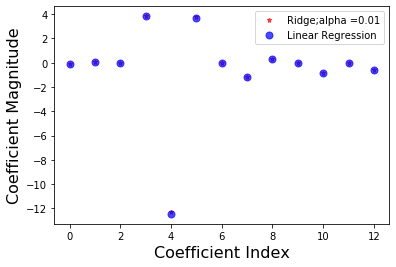

In [73]:
plt.plot(rr.coef_,alpha = 0.7,linestyle='none',marker ='*',markersize = 5,color = 'red',label = 'Ridge;alpha =0.01')
plt.plot(lr.coef_,alpha = 0.7,linestyle='none',marker ='o',markersize =7 ,color = 'blue',label = 'Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize = 16)
plt.legend()
plt.show()

In above plot for low value of alpha(0.01) denoted as redstar,when the coefficients are less restricted,the coefficient magnitudes are almost same as of Linear Regression,so try for higher value of alpha = 100,for coefficient indices 3,4,5 the magitudes are considerably less compared to Linear Regression case.When building Regression models,Ridge Regressionn is best choice.

# Lasso Regression(Least Absolute Shrinkage and Selection Operator Regression)
Just like Ridge regression it also adds a regularization term.It automatically performs feature selection and outputs a sparse model,it performs feature selection as well.Here some of the coefficients become zero.It is mahorly used to prevent overfitting as well as feature selection.It generally works well even in presence of highly correlated features as it will include all of them in the model,but the coefficients will be distributed among them depending on the correlation.

In [74]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.47155455])

In [75]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_breast_cancer
cancer= load_breast_cancer()

In [76]:
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [77]:
print(cancer.data.shape)

(569, 30)


In [78]:
cancer_df = pd.DataFrame(cancer.data,columns = cancer.feature_names)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [79]:
X = cancer.data
Y = cancer.target

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 31)

In [94]:
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [95]:
train_score=lasso.score(X_train,y_train)
test_Score = lasso.score(X_test,y_test)

In [96]:
import numpy as np
coeff_used = np.sum(lasso.coef_!=0)
coeff_used

4

In [97]:
print("training score",train_score)
print("test score",test_score)
print("number of features used:",coeff_used)

training score 0.5600974529893079
test score 0.7147895265576849
number of features used: 4


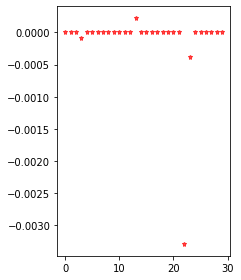

In [98]:
plt.xlabel("Coefficient Index",fontsize = 16)
plt.ylabel("Coefficient Magnitude",fontsize = 16)
plt.subplot(122)
plt.plot(lasso.coef_,alpha = 0.7,linestyle='none',marker ='*',markersize = 5,color = 'red',label = 'Lasso;alpha =1')
plt.tight_layout()
plt.show()

As there are 30 features,initially but on application of Lasso regression,only 4 features are used,rest are all shrunk to zero(see th red stars in above plot)Try for different alpha to get best test score if you get less test and train scores as the data falls under underfitting.

In [9]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1,l1_ratio = 0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.05129777])